In [1]:
import numpy as np 
import pandas as pd 
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df=pd.read_excel("TSLA.xlsx",index_col=0)

#some initial data preprocessing for right format
a='%Y-%m-%d %H:%M:%S'
df.time=pd.to_datetime(df.time,format=a,errors='coerce')
df=df[df['time'].notna()]
df=df[::-1].reset_index(drop=True)
df[["open", "high","low","close","volume"]] = df[["open", "high","low","close","volume"]].apply(pd.to_numeric)


In [3]:
df.head()

,time,open,high,low,close,volume
0,2020-08-28 04:05:00,451.998,451.998,451.998,451.998,2820
1,2020-08-28 04:10:00,452.000,452.000,452.000,452.000,1855
2,2020-08-28 04:25:00,453.558,453.558,453.558,453.558,1370
3,2020-08-28 04:35:00,454.012,454.012,454.000,454.000,3715
4,2020-08-28 04:50:00,453.602,453.602,453.540,453.540,2855


In [4]:
#taking close price----preparing training data

data=df[["time","close"]]
data=data.rename(columns={"time": "ds", "close": "y"})

In [5]:
len(data)

45011

In [6]:
#spliting training and testing data
df_train=data[0:35000]
df_test=data[35000:]

In [23]:
m = Prophet()
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [8]:
result=m.predict(df_test)
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-01 18:10:00,576.191418,547.394408,612.986067,576.191418,576.191418,4.233987,4.233987,4.233987,-1.025534,-1.025534,-1.025534,5.259522,5.259522,5.259522,0.0,0.0,0.0,580.425405
1,2021-06-01 18:15:00,576.181290,546.195435,612.945301,576.181290,576.181290,4.207398,4.207398,4.207398,-1.050453,-1.050453,-1.050453,5.257851,5.257851,5.257851,0.0,0.0,0.0,580.388688
2,2021-06-01 18:20:00,576.171162,547.119240,615.722416,576.171162,576.171162,4.178653,4.178653,4.178653,-1.077437,-1.077437,-1.077437,5.256090,5.256090,5.256090,0.0,0.0,0.0,580.349816
3,2021-06-01 18:25:00,576.161035,548.307018,614.619104,576.161035,576.161035,4.147914,4.147914,4.147914,-1.106324,-1.106324,-1.106324,5.254238,5.254238,5.254238,0.0,0.0,0.0,580.308949
4,2021-06-01 18:30:00,576.150907,546.721331,613.298637,576.150907,576.150907,4.115370,4.115370,4.115370,-1.136926,-1.136926,-1.136926,5.252296,5.252296,5.252296,0.0,0.0,0.0,580.266277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,2021-08-20 19:40:00,342.670696,-1010.310921,1665.445775,-984.340498,1653.866548,-5.510447,-5.510447,-5.510447,-1.581589,-1.581589,-1.581589,-3.928858,-3.928858,-3.928858,0.0,0.0,0.0,337.160249
10007,2021-08-20 19:45:00,342.660568,-987.906972,1640.356580,-984.462864,1653.927318,-5.546989,-5.546989,-5.546989,-1.599681,-1.599681,-1.599681,-3.947308,-3.947308,-3.947308,0.0,0.0,0.0,337.113579
10008,2021-08-20 19:50:00,342.650441,-973.480594,1639.456716,-984.585231,1653.988089,-5.579484,-5.579484,-5.579484,-1.613737,-1.613737,-1.613737,-3.965747,-3.965747,-3.965747,0.0,0.0,0.0,337.070957
10009,2021-08-20 19:55:00,342.640313,-1010.288796,1628.930637,-984.707597,1654.048860,-5.607512,-5.607512,-5.607512,-1.623339,-1.623339,-1.623339,-3.984174,-3.984174,-3.984174,0.0,0.0,0.0,337.032801


In [9]:
result['yhat'].to_list()

[580.4254050135984,
 580.3886878741233,
 580.3498156386182,
 580.3089492010803,
 580.2662773800897,
 580.2220164099048,
 580.1764092032926,
 580.1297243874574,
 580.0822551158415,
 580.0343176617588,
 579.9384089801661,
 579.8911703186454,
 579.8449243916109,
 579.8000748722268,
 579.7162299598681,
 579.6780840224368,
 579.643027737993,
 579.6114899290325,
 579.5838956666444,
 579.5606631958054,
 579.54220083964,
 578.8874004496735,
 578.7760701615164,
 578.672341264201,
 578.576240070343,
 578.2671331905273,
 578.1104682810296,
 578.071385090807,
 578.0383832228407,
 577.960206494172,
 577.9522059026849,
 577.9480067344699,
 577.9539530625559,
 577.9690804095986,
 577.9787233431251,
 577.9892064485173,
 578.000135356669,
 578.0111307483978,
 578.0218306179329,
 578.0318923580141,
 578.0488391730242,
 578.0551520520249,
 578.0596851548923,
 578.0625541508695,
 578.0605306420341,
 578.0560094896764,
 578.0488822379016,
 578.0390689741815,
 578.0265180087812,
 578.0112053397573,
 577.993

In [10]:
from sklearn.metrics import mean_absolute_percentage_error

In [16]:
error=mean_absolute_percentage_error(df_test['y'].to_list(),result['yhat'].to_list())

In [17]:
accuracy=1-error
accuracy

0.7034314010979016

In [26]:
future = m.make_future_dataframe(periods=10000,freq='5min')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
55006,2021-09-24 13:00:00,745.391424,427.898462,1047.306694
55007,2021-09-24 13:05:00,745.371652,439.782254,1045.826212
55008,2021-09-24 13:10:00,745.350732,452.436751,1041.771343
55009,2021-09-24 13:15:00,745.328663,439.312135,1038.046839
55010,2021-09-24 13:20:00,745.305452,436.699045,1038.935365


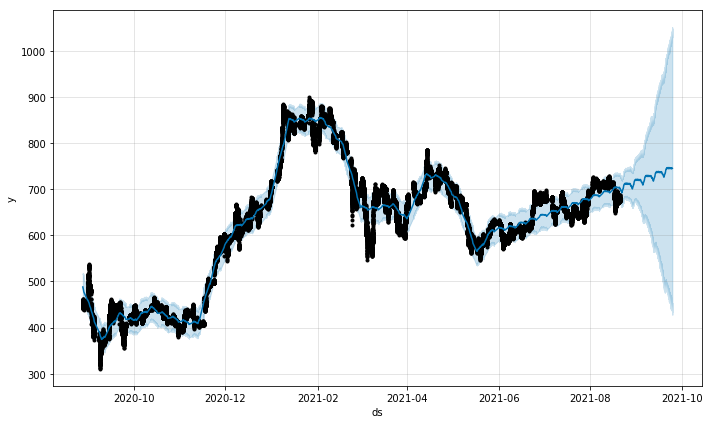

In [27]:
fig1 = m.plot(forecast)

